In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
 

In [38]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2018-11-02 07:51:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.002s  

2018-11-02 07:51:21 (16.4 MB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [40]:
df = pd.read_csv('teleCust1000t.csv')
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [46]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]
y = df['custcat'].values
y[0:5]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [47]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


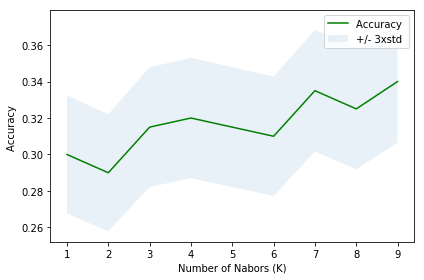

The best accuracy was with 0.34 with k= 9


In [50]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [52]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [55]:
import pandas as pd
cdf=cust_df.dropna(axis=0)
df = cdf.drop('Address', axis=1)
#cdf=cdf.drop(columns=['Address'] );

In [56]:
y = df['DebtIncomeRatio']
X = df.drop([ 'DebtIncomeRatio'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=6)

In [93]:

#k-Nearest Neighbour


from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
a=[]
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i) 
    clf.fit(X_train, y_train)  
    a.append(clf.score(X_test, y_test))


0.36
At k = 16  We Got maximum accuracy


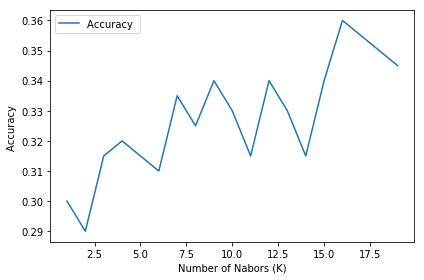

In [94]:


for i in range(1,19):
    if max<a[i]: 
        max=a[i];
        index=i;
        
print(max)
print("At k =",index+1," We Got maximum accuracy"); 
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],a)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()



At k = 16  We Got maximum accuracy


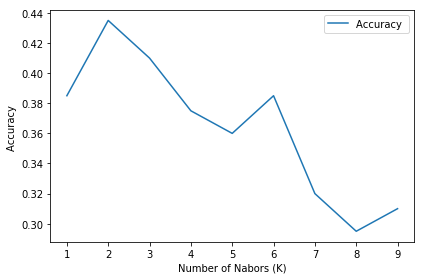

In [95]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

a=[]
for i in range(1,10):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree.fit(X_train, y_train)  
    a.append(drugTree.score(X_test, y_test))
print("At k =",index+1," We Got maximum accuracy"); 
plt.plot([1,2,3,4,5,6,7,8,9],a)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()



In [96]:
#Support Vector Machine

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)



0.39000000000000001

In [91]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [97]:


from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)



0.39500000000000002